<a href="https://colab.research.google.com/github/willakuffo/accel_iot_data_collection/blob/master/accel_keras_to_tflite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import tensorflow as tf
import pandas as pd

Get Model

In [2]:

!wget https://github.com/willakuffo/accel_iot_data_collection/blob/master/accelmodel.hdf5?raw=true

--2020-12-23 16:30:19--  https://github.com/willakuffo/accel_iot_data_collection/blob/master/accelmodel.hdf5?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/willakuffo/accel_iot_data_collection/raw/master/accelmodel.hdf5 [following]
--2020-12-23 16:30:19--  https://github.com/willakuffo/accel_iot_data_collection/raw/master/accelmodel.hdf5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/willakuffo/accel_iot_data_collection/master/accelmodel.hdf5 [following]
--2020-12-23 16:30:20--  https://raw.githubusercontent.com/willakuffo/accel_iot_data_collection/master/accelmodel.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw

Get inputs

In [3]:
!wget https://github.com/willakuffo/accel_iot_data_collection/blob/master/X.pickle?raw=true

--2020-12-23 16:30:20--  https://github.com/willakuffo/accel_iot_data_collection/blob/master/X.pickle?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/willakuffo/accel_iot_data_collection/raw/master/X.pickle [following]
--2020-12-23 16:30:20--  https://github.com/willakuffo/accel_iot_data_collection/raw/master/X.pickle
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/willakuffo/accel_iot_data_collection/master/X.pickle [following]
--2020-12-23 16:30:21--  https://raw.githubusercontent.com/willakuffo/accel_iot_data_collection/master/X.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.1

Get Labels

In [4]:
!wget https://github.com/willakuffo/accel_iot_data_collection/blob/master/Y.pickle?raw=true

--2020-12-23 16:30:22--  https://github.com/willakuffo/accel_iot_data_collection/blob/master/Y.pickle?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/willakuffo/accel_iot_data_collection/raw/master/Y.pickle [following]
--2020-12-23 16:30:22--  https://github.com/willakuffo/accel_iot_data_collection/raw/master/Y.pickle
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/willakuffo/accel_iot_data_collection/master/Y.pickle [following]
--2020-12-23 16:30:22--  https://raw.githubusercontent.com/willakuffo/accel_iot_data_collection/master/Y.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.1

Load Data

In [5]:
import os
os.path.exists('X.pickle?raw=true')

True

In [6]:
with open('X.pickle?raw=true','rb') as d:
  X = pickle.load(d)


In [7]:
X.shape

(4000, 242)

In [8]:
with open('Y.pickle?raw=true','rb') as d:
  Y = pickle.load(d)


In [9]:
Y.shape

(4000, 3)

Load trained model

In [10]:
from keras.models import load_model
trained_model = load_model('accelmodel.hdf5?raw=true')

In [11]:
trained_model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 242)               58806     
_________________________________________________________________
dense_236 (Dense)            (None, 512)               124416    
_________________________________________________________________
dense_237 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_238 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_239 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_240 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_241 (Dense)            (None, 16)              

Test model inferences

In [12]:
from sklearn.preprocessing import MinMaxScaler
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()
scaled_input = input_scaler.fit_transform(X)
scaled_output = output_scaler.fit_transform(Y)
prediction = trained_model.predict(scaled_input)
prediction

array([[0.48409465, 0.58062047, 0.4962456 ],
       [0.48224485, 0.5559506 , 0.49446756],
       [0.48258567, 0.56049603, 0.49479517],
       ...,
       [0.4976359 , 0.76121306, 0.5092613 ],
       [0.4966249 , 0.74772954, 0.5082895 ],
       [0.49671537, 0.74893636, 0.5083765 ]], dtype=float32)

In [13]:
#unscale predicted output
p = output_scaler.inverse_transform(prediction)
p.shape

(4000, 3)

In [14]:
#calc fit between predicted and actual
distance_pred = p[:,1]
distance_actual = Y[:,1]
distance_actual.shape,distance_pred.shape

((4000,), (4000,))

In [15]:
from sklearn.metrics import r2_score
r2_score(distance_actual,distance_pred)

0.8946321231398165

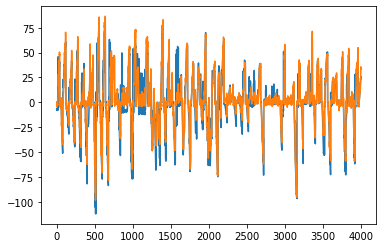

In [16]:
import matplotlib.pyplot as plt
plt.plot(distance_actual)
plt.plot(distance_pred)

Convert model to tflite

In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(trained_model)
tflite_model = converter.convert()
open('tflite_model.tflite','wb').write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpk7jgr4c_/assets


1438024

Test tflite model -> interpreter

Load model

In [18]:
interpreter = tf.lite.Interpreter(model_path = 'tflite_model.tflite')

In [19]:

interpreter.allocate_tensors()

In [20]:
#Get input and  output tesnsors
output_details = interpreter.get_output_details()
output_details

[{'dtype': numpy.float32,
  'index': 27,
  'name': 'Identity',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([1, 3], dtype=int32),
  'shape_signature': array([-1,  3], dtype=int32),
  'sparsity_parameters': {}}]

In [21]:

input_details = interpreter.get_input_details()
input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'dense_235_input',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 242], dtype=int32),
  'shape_signature': array([ -1, 242], dtype=int32),
  'sparsity_parameters': {}}]

In [22]:
input_shape = input_details[0]['shape']
input_shape

array([  1, 242], dtype=int32)

In [23]:
import numpy as np


In [24]:
#sample_input = np.reshape(X[0],(1,-1))
sample_input = np.array(scaled_input,dtype= np.float32)
sample_input.shape

(4000, 242)

In [25]:
sample_input[0].shape

(242,)

In [26]:
#input_data = sc.fit_transform(sample_input)
input_data = np.reshape(sample_input[1],(1,-1))
input_data.shape

(1, 242)

In [27]:
interpreter.set_tensor(input_details[0]['index'],input_data)

In [28]:
interpreter.invoke()

In [29]:
output_data = interpreter.get_tensor(output_details[0]['index'])

In [30]:
output_data

array([[0.48224485, 0.5559505 , 0.49446756]], dtype=float32)

In [31]:
output_scaler.inverse_transform(output_data)

array([[-3.5816855 , -4.166915  , -0.42288858]], dtype=float32)

In [32]:
Y[0]

array([-2.89775297, -6.8729    , -6.8729    ])

In [33]:
interpreter = tf.lite.Interpreter(model_path = 'tflite_model.tflite')
interpreter.allocate_tensors()
output_details = interpreter.get_output_details()
input_details = interpreter.get_input_details()
input_shape = input_details[0]['shape']

def predict_tflite(input_data):
  input_data = np.array(input_data,dtype = np.float32)
  interpreter.set_tensor(input_details[0]['index'],input_data)
  interpreter.invoke()
  output_data = interpreter.get_tensor(output_details[0]['index'])
  return output_data




In [34]:
scaled_input[0]

array([0.65204082, 0.11348837, 0.        , 0.23232323, 0.11610129,
       0.20544427, 0.26033465, 0.38922156, 0.31026499, 0.3551486 ,
       0.16576028, 0.44994026, 0.48563673, 0.23522441, 0.31387837,
       0.20458606, 0.10209258, 0.16609784, 0.1338766 , 0.27694899,
       0.42205019, 0.26617325, 0.26904506, 0.17663344, 0.28964781,
       0.20659183, 0.24658111, 0.28471889, 0.41132152, 0.44721931,
       0.24638563, 0.24265734, 0.29657008, 0.20613236, 0.23467396,
       0.257285  , 0.06144698, 0.17792069, 0.17659425, 0.19237288,
       0.3       , 0.82938026, 1.        , 0.89477041, 0.85323966,
       0.69875931, 0.96875   , 0.46625587, 0.75165417, 0.6794164 ,
       0.81189488, 0.53033981, 0.76128508, 0.61860465, 0.63493064,
       0.60521236, 0.6608547 , 0.61055341, 0.55018172, 0.80778739,
       0.68956407, 0.76868687, 0.70867151, 0.7956611 , 0.74799082,
       0.86011905, 0.70991909, 0.67072621, 0.66737664, 0.68998273,
       0.84874195, 0.99793103, 0.9135514 , 0.82134196, 0.88102

In [35]:
predicted = []
for i in range(len(scaled_input)):
  tflite_predicted =  output_scaler.inverse_transform(predict_tflite(np.reshape(scaled_input[i],(1,-1))))
  predicted.append(tflite_predicted[0][1])
  print('actual:',Y[i][1],'    predicted:',tflite_predicted[0][1])

actual: -6.8729000000000156     predicted: 0.6228946
actual: -7.6029000000000195     predicted: -4.166915
actual: -6.8729000000000156     predicted: -3.2843807
actual: -5.99290000000002     predicted: -3.1010945
actual: -8.032900000000012     predicted: -3.5131004
actual: -6.462900000000019     predicted: -2.3682976
actual: -7.72290000000001     predicted: -2.4954221
actual: -8.032900000000012     predicted: -1.9363753
actual: -6.022900000000007     predicted: -2.4807248
actual: -8.062900000000013     predicted: -1.5813178
actual: -6.772900000000007     predicted: -2.7853723
actual: -7.712900000000019     predicted: -2.5830727
actual: -8.11290000000001     predicted: -2.5228028
actual: -6.36290000000001     predicted: -2.2379212
actual: -7.542900000000017     predicted: -2.653318
actual: 44.297099999999986     predicted: -1.3002899
actual: -7.142900000000012     predicted: 1.7495288
actual: -5.802900000000008     predicted: 4.267728
actual: 36.31709999999999     predicted: 8.840032
act

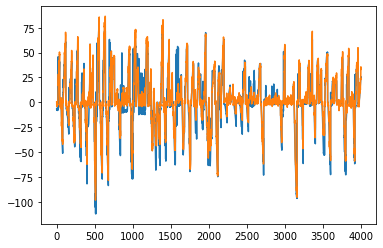

In [36]:
plt.plot(Y[:,1])
plt.plot(predicted)


In [37]:
r2_score(Y[:,1],predicted)

0.8946321137211029